In [1]:
%load_ext autoreload
%autoreload 2

In [63]:
import pandas as pd
import numpy as np

import dash_bio as dashbio
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3

from talus_data_analysis.plot import volcano, heatmap, box, pca, clustergram, venn
from talus_data_analysis.reshape import uniprot_protein_name

import plotly as py
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.offline import iplot
# pio.renderers.default = 'iframe'

from scipy.stats import t
from scipy.special import binom
from sklearn.decomposition import PCA

In [16]:
df = pd.read_csv("../data/210308_MLLtx/msstats_groupcompare.csv")

In [17]:
df = df[["Protein", "Label", "log2FC", "SE", "Tvalue", "DF", "pvalue", "adj.pvalue", "issue"]]

In [18]:
df["ProteinName"] = df["Protein"].str.upper().apply(lambda x: x.split("|")[-1].replace("_HUMAN", ""))

In [19]:
drug1_dmso = df[df["Label"] == "DRUG1/DMSO"]

In [20]:
drug1_dmso

,Protein,Label,log2FC,SE,Tvalue,DF,pvalue,adj.pvalue,issue,ProteinName
0,sp|A0A096LP01|SIM26_HUMAN,DRUG1/DMSO,inf,NaN,NaN,NaN,NaN,0.000000,oneConditionMissing,SIM26
1,sp|A0A1B0GTU1|ZC11B_HUMAN,DRUG1/DMSO,-0.004531,0.189156,-0.023956,5.0,0.981814,0.992201,NaN,ZC11B
2,sp|A0AV96|RBM47_HUMAN,DRUG1/DMSO,-0.258933,0.116533,-2.221980,5.0,0.076937,0.224621,NaN,RBM47
3,sp|A0AVK6|E2F8_HUMAN,DRUG1/DMSO,-0.910213,0.293271,-3.103656,5.0,0.026742,0.116895,NaN,E2F8
4,sp|A0AVT1|UBA6_HUMAN,DRUG1/DMSO,-0.041890,0.068906,-0.607933,5.0,0.569784,0.739208,NaN,UBA6
...,...,...,...,...,...,...,...,...,...,...
7267,sp|Q9Y6X4|F169A_HUMAN,DRUG1/DMSO,0.601826,0.118524,5.077674,5.0,0.003842,0.036591,NaN,F169A
7268,sp|Q9Y6X5|ENPP4_HUMAN,DRUG1/DMSO,-0.255965,1.069038,-0.239435,3.0,0.826195,0.906432,NaN,ENPP4
7269,sp|Q9Y6X8|ZHX2_HUMAN,DRUG1/DMSO,-0.056572,0.130691,-0.432871,5.0,0.683145,0.816638,NaN,ZHX2
7270,sp|Q9Y6X9|MORC2_HUMAN,DRUG1/DMSO,-0.184500,0.039427,-4.679582,5.0,0.005436,0.043646,NaN,MORC2


In [21]:
presence_absence = volcano_list_presence_absence(df=drug1_dmso, 
                                                 log_fold_change_col='log2FC')
presence_absence

,Presence,Absence
0,SIM26,KLRG2
1,BDP1,P121C
2,MCA3,MCRI1
3,SPOP,MATN2
4,DEPD5,KI21B
...,...,...
133,MED31,
134,SNX5,
135,TACC3,
136,SAR1B,


In [22]:
fig = volcano(df=drug1_dmso, 
              log_fold_change_col='log2FC', 
              pvalue_col='adj.pvalue', 
              pvalue_threshold=(0.05, 0.05), 
              log_fold_change_threshold=(2**2, 2**2), 
              label_column_name="ProteinName",
            #   filter_labels=["CBP", "EP300"],
              dim=(1000,750),
              sign_line=True)
# fig.show()

In [23]:
fig = heatmap(df=df, 
              log_fold_change_col='log2FC', 
              pvalue_col='adj.pvalue', 
              start_idx=0,
              log_fold_change_threshold=(2**2, 2**2),
              pvalue_threshold=(0.05, 0.05),
              sort_ascending=False,
              x_label_column_name="Label",
              y_label_column_name="ProteinName",
              value_column_name="log2FC",
#               filter_labels=[("ProteinName", ["IZUM2", "S2A4R", "MYC", "HBB", "BID", "S4A4"])],
              dim=(750,1000))
# fig.show()

In [24]:
protein_df = df[df["ProteinName"] == "MYC"]

In [25]:
fig = comparison(df=protein_df,
                 log_fold_change_col="log2FC",
                 pvalue_col="adj.pvalue",
                 pvalue_threshold=0.05,
                 label_column_name="Label",
                 xaxis_title="Comparison",
                 yaxis_title="log2 fold change",
                 dim=(750, 750))
# fig.show()

## Validation Plots

In [27]:
df_val = pd.read_csv("../data/210308_MLLtx/elib2msstats_output.csv")

In [28]:
df_val.head()

,PeptideSequence,ProteinName,Intensity,Run,PrecursorCharge,BioReplicate,Condition,IsotopeLabelType,FragmentIon,ProductCharge
0,SSDVHSSGSSDAHMDASGPSDSDMPSR,sp|O15042|SR140_HUMAN,45809464.0,210308_talus_03.mzML,3.0,1.0,DRUG2,L,y0,1
1,VVGRPQPQLQYVDALGYVSLFPLLLR,sp|Q13724|MOGS_HUMAN,7372710.0,210308_talus_03.mzML,3.0,1.0,DRUG2,L,y0,1
2,RGAYGGGYGGYDDYNGYNDGYGFGSDR,sp|P31943|HNRH1_HUMAN,134068368.0,210308_talus_03.mzML,3.0,1.0,DRUG2,L,y0,1
3,CYVDMSTVDADTVTELAQVIVSR,sp|Q49A26|GLYR1_HUMAN,45137608.0,210308_talus_03.mzML,3.0,1.0,DRUG2,L,y0,1
4,QHCTEEDEEEDEEEEEESFMTSR,sp|Q9NY27|PP4R2_HUMAN,62207588.0,210308_talus_03.mzML,3.0,1.0,DRUG2,L,y0,1


In [30]:
df_val_norm = pd.read_csv("../data/210308_MLLtx/elib2msstats_output_normalized.csv")

In [31]:
df_val_norm.head()

,PROTEIN,PEPTIDE,TRANSITION,FEATURE,LABEL,GROUP_ORIGINAL,SUBJECT_ORIGINAL,RUN,GROUP,SUBJECT,INTENSITY,SUBJECT_NESTED,ABUNDANCE,FRACTION,originalRUN,censored
0,sp|A0A096LP01|SIM26_HUMAN,DGSASEVPSELSERPK_3,y0_1,DGSASEVPSELSERPK_3_y0_1,L,DMSO,5,1,1,5,1.000000e+00,1.5,0.000000,1,210308_talus_01b.mzML,True
1,sp|A0A1B0GTU1|ZC11B_HUMAN,LGMSADPNNEDATDKVNK_2,y0_1,LGMSADPNNEDATDKVNK_2_y0_1,L,DMSO,5,1,1,5,1.525856e+06,1.5,20.912808,1,210308_talus_01b.mzML,False
2,sp|A0AV96|RBM47_HUMAN,DVYEDELVPVFEAVGR_2,y0_1,DVYEDELVPVFEAVGR_2_y0_1,L,DMSO,5,1,1,5,2.283037e+07,1.5,24.816071,1,210308_talus_01b.mzML,False
3,sp|A0AV96|RBM47_HUMAN,DYAFVHFTSR_3,y0_1,DYAFVHFTSR_3_y0_1,L,DMSO,5,1,1,5,7.233434e+06,1.5,23.157870,1,210308_talus_01b.mzML,False
4,sp|A0AV96|RBM47_HUMAN,ELNNYEIRPGR_2,y0_1,ELNNYEIRPGR_2_y0_1,L,DMSO,5,1,1,5,2.488995e+05,1.5,18.296824,1,210308_talus_01b.mzML,False


In [32]:
fig = correlation(x=df_val[df_val["BioReplicate"] == 1.0]["Intensity"].values,
                  y=df_val[df_val["BioReplicate"] == 4.0]["Intensity"].values,
                  filter_outliers=True,
                  xaxis_title="replicate 1",
                  yaxis_title="replicate 2",
                  dim=(500,500))
# fig.show()

In [33]:
fig = scatter_matrix(df_val,
                     x_label_column_name="Condition", 
                     y_label_column_name="ProteinName",
                     value_column_name="Intensity",
                     filter_outliers=True,
                     log_scaling=True,
                     dim=(1000, 1000))
# fig.show()

In [34]:
fig.layout["width"]

1000

In [35]:
fig = box(df=df_val, 
          x_label_column_name="Run",
          y_label_column_name="Intensity",
          log_scaling=True,
          filter_outliers=True,
          show_points=False,
          xaxis_title="Sample",
          yaxis_title="log_intensity",
          dim=(750,1000))
# fig.show()

In [36]:
fig = box(df=df_val_norm, 
          x_label_column_name="originalRUN",
          y_label_column_name="ABUNDANCE",
          log_scaling=False,
          filter_outliers=True,
          show_points=False,
          xaxis_title="Sample",
          yaxis_title="log_intensity",
          dim=(750,1000))
# fig.show()

In [38]:
df_proteins = pd.read_table("../data/210308_MLLtx/RESULTS-quant.elib.proteins.txt")

In [39]:
df_proteins.head()

,Protein,NumPeptides,PeptideSequences,210308_talus_01.mzML,210308_talus_01b.mzML,210308_talus_02.mzML,210308_talus_02b.mzML,210308_talus_03.mzML,210308_talus_03b.mzML,210308_talus_10.mzML,210308_talus_10b.mzML,210308_talus_11b.mzML,210308_talus_12.mzML,210308_talus_12b.mzML
0,sp|O15042|SR140_HUMAN,37,AAAEIYEEFLAAFEGSDGNK;AAAEIYEEFLAAFEGSDGNKVK;AW...,1.846157e+09,1.896727e+09,1.924472e+09,1.887913e+09,1.910436e+09,1.881111e+09,1.857518e+09,1.727081e+09,1.902900e+09,1.529344e+09,1.504890e+09
1,sp|Q13724|MOGS_HUMAN,36,ANVVGNVWR;ASHPSVTER;AVPAEGVR;AVQLKPRPPQGLVR;C[...,2.074592e+09,2.118283e+09,2.228449e+09,2.186625e+09,2.033632e+09,1.954896e+09,1.787139e+09,1.757930e+09,1.831361e+09,1.845982e+09,1.780380e+09
2,sp|P31943|HNRH1_HUMAN,14,EEIVQFFSGLEIVPNGITLPVDFQGR;EGRPSGEAFVELESEDEVK...,1.337932e+10,1.356821e+10,1.425074e+10,1.330901e+10,1.390320e+10,1.284385e+10,1.367287e+10,1.344676e+10,1.497478e+10,1.139331e+10,1.115461e+10
3,sp|Q49A26|GLYR1_HUMAN,26,AKALDQSDNDMSAVYR;ALDQSDNDMSAVYR;C[+57.021464]D...,1.396191e+09,1.401341e+09,1.405597e+09,1.358423e+09,1.547236e+09,1.465517e+09,1.641950e+09,1.553284e+09,1.667778e+09,1.452925e+09,1.449926e+09
4,sp|Q9NY27|PP4R2_HUMAN,18,EANLQQNEEK;EMIPERK;ETEELVGSNSSK;GPPNPNVEYIPFDE...,1.031090e+09,1.114308e+09,8.761282e+08,8.761192e+08,8.345175e+08,8.271673e+08,7.807276e+08,7.599476e+08,9.634975e+08,7.638585e+08,7.402296e+08


In [40]:
fig = histogram(df=df_proteins,
                x_label_column_name="NumPeptides",
                xaxis_title="# of Peptides",
                yaxis_title="Number of Proteins",
                value_cutoff=30)

# fig.show()

In [42]:
df_peptides = pd.read_table("../data/210308_MLLtx/RESULTS-quant.elib.peptides.txt")
df_peptides = df_peptides.set_index(["Peptide"])
df_peptides = df_peptides.drop(["Protein", "numFragments"], axis=1)
# df_peptides = df_peptides.set_index(["Peptide", "Protein", "numFragments"])

In [43]:
df_peptides.head()

,210308_talus_01.mzML,210308_talus_01b.mzML,210308_talus_02.mzML,210308_talus_02b.mzML,210308_talus_03.mzML,210308_talus_03b.mzML,210308_talus_10.mzML,210308_talus_10b.mzML,210308_talus_11b.mzML,210308_talus_12.mzML,210308_talus_12b.mzML
Peptide,,,,,,,,,,,
AAAAAAAAAAAAAAAASAGGK,2.403030e+07,2.786389e+07,4.407701e+07,3.870284e+07,3.242346e+07,25332058.0,32256750.0,3.193199e+07,2.611193e+07,1.382369e+07,1.832494e+07
AAAAAAAAAAAAAAAGAGAGAK,1.323888e+06,1.211310e+06,9.284594e+05,2.533484e+06,1.394490e+06,1247612.1,1134801.2,1.007315e+06,1.859432e+06,5.471446e+05,1.165264e+06
AAAAAAAAAPAAAATAPTTAATTAATAAQ,1.465808e+09,1.616043e+09,1.633030e+09,1.096759e+09,1.353608e+09,692691330.0,999538820.0,1.060435e+09,1.802474e+09,9.627104e+08,1.376485e+09
AAAAAAAAAVSR,2.784300e+08,2.648823e+08,2.334104e+08,2.390830e+08,2.476812e+08,225380272.0,251502400.0,2.472616e+08,2.801511e+08,1.899574e+08,1.924243e+08
AAAAAAAAGAFAGR,2.485319e+07,1.709496e+07,2.424792e+07,1.175962e+07,1.628926e+07,8330254.0,2237044.8,0.000000e+00,6.721775e+06,2.841159e+06,3.927024e+06


In [44]:
pca_peptides = PCA(n_components=2)
pca_components = pca_peptides.fit_transform(df_peptides.values.T)
explained_variance_ratio = pca_peptides.explained_variance_ratio_

In [45]:
n=200
most_important_features = [(-np.abs(comp)).argsort()[:n] for comp in pca_peptides.components_]

In [46]:
fig = pca(pca_components=pca_components,
          labels=df_peptides.columns,
          dim=(750, 750),
          title="PCA",
          xaxis_title=f"Principal Component 1 ({round(explained_variance_ratio[0]*100, 2)}%)",
          yaxis_title=f"Principal Component 2 ({round(explained_variance_ratio[1]*100, 2)}%)")
# fig.show()

In [48]:
most_important_peptides = df_peptides.iloc[most_important_features[0], :]

In [61]:
most_important_peptides

,210308_talus_01.mzML,210308_talus_01b.mzML,210308_talus_02.mzML,210308_talus_02b.mzML,210308_talus_03.mzML,210308_talus_03b.mzML,210308_talus_10.mzML,210308_talus_10b.mzML,210308_talus_11b.mzML,210308_talus_12.mzML,210308_talus_12b.mzML
Peptide,,,,,,,,,,,
LLLPGELAK,2.859762e+10,2.927775e+10,1.550375e+10,1.474559e+10,3.767737e+10,3.729138e+10,1.611978e+10,1.624154e+10,1.326303e+10,1.480755e+10,1.573434e+10
VFLENVIR,2.300676e+10,2.374046e+10,1.226774e+10,1.205821e+10,3.127304e+10,3.044975e+10,1.238936e+10,1.268301e+10,1.000008e+10,1.157843e+10,1.139059e+10
AGLQFPVGR,1.940709e+10,1.903098e+10,1.001730e+10,1.062859e+10,2.610323e+10,2.687205e+10,1.149525e+10,1.074197e+10,9.239007e+09,1.120488e+10,1.041211e+10
ISGLIYEETR,1.618324e+10,1.722419e+10,8.243930e+09,9.637640e+09,2.373061e+10,2.454758e+10,9.083128e+09,9.249291e+09,6.964120e+09,8.700135e+09,8.567005e+09
EITALAPSTMK,5.242765e+10,5.079731e+10,4.330379e+10,4.439509e+10,5.008936e+10,5.180828e+10,3.578584e+10,3.526641e+10,3.481980e+10,4.528944e+10,4.492144e+10
...,...,...,...,...,...,...,...,...,...,...,...
VAVFFGGLSIK,1.437987e+09,1.384528e+09,2.439390e+09,2.276699e+09,2.084459e+09,1.836828e+09,2.591828e+09,2.419008e+09,2.447137e+09,2.018002e+09,1.926523e+09
HAAENPGKYNILGTNTIMDK,1.089417e+09,1.149242e+09,2.969370e+08,3.120248e+08,5.134536e+08,4.897046e+08,4.599540e+07,4.281176e+07,2.825229e+08,8.934300e+07,9.103126e+07
TEADAEKTFEEK,1.993417e+09,1.713680e+09,1.365136e+09,1.084094e+09,1.537410e+09,1.212135e+09,7.720125e+08,6.180364e+08,1.428929e+09,8.956868e+08,8.392207e+08


In [55]:
fig = clustergram(df=most_important_peptides,
                  column_labels=list(df_peptides.columns.values),
                  title="Clustergram",
                  dim=(800, 1000))
# fig.show()

In [98]:
nuclear_proteins_df = pd.read_parquet("../data/compartment_enrichment_candidates.parquet")

In [99]:
nuclear_proteins = nuclear_proteins_df["protein"].unique()

In [100]:
measured_proteins = df_val["ProteinName"].unique()

In [50]:
len(set(nuclear_proteins).intersection(set(measured_proteins)))

33

In [ ]:
fig = venn(sets=[set(nuclear_proteins), set(measured_proteins)], 
           labels=["Nuclear Proteins", "Measured Proteins"],
           title="Venn Diagram")
# fig.show()

# Experimental Section

In [77]:
baf_complex = pd.read_csv("../data/baf_complex_proteins.csv")
baf_complex["BAF Complex Proteins"] = baf_complex["BAF Complex Proteins"].apply(uniprot_protein_name)
baf_complex = baf_complex.rename(columns={"BAF Complex Proteins": "ProteinName"})

In [67]:
df = pd.read_csv("../data/210308_MLLtx/peptide_proteins_results.csv", index_col=0)

/Users/ricomeinl/Library/Caches/pypoetry/virtualenvs/talus-data-analysis-rg3us7cs-py3.8/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [69]:
df = df[["PeptideSequence", "ProteinName", "Intensity"]]
df["ProteinName"] = df["ProteinName"].apply(uniprot_protein_name)

In [86]:
merged_df = df.merge(baf_complex, on="ProteinName", how="right")
merged_df = merged_df.drop("ProteinName", axis=1)
merged_df = merged_df.set_index("PeptideSequence")

In [98]:
fig = px.imshow(
        merged_df,
        aspect="auto",
    )

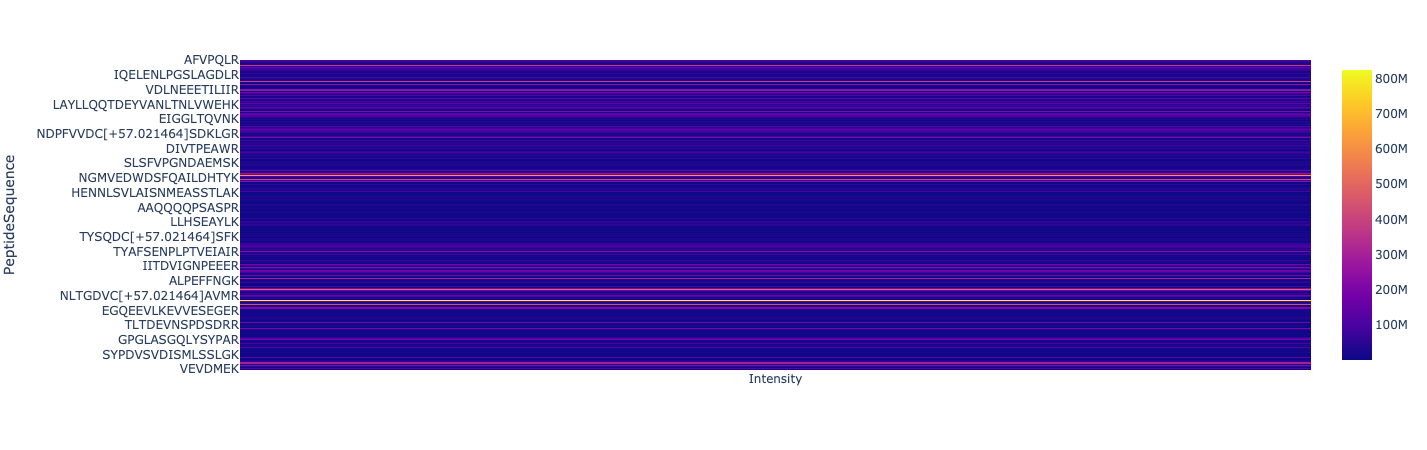

In [99]:
fig.show()

In [100]:
df_peptides = pd.read_table("../data/210308_MLLtx/RESULTS-quant.elib.peptides.txt")

In [108]:
df_peptides["Peptide"].nunique()

83087